In [1]:
#Importing libraries 
%matplotlib inline
import statsmodels.api as sm
import numpy as np 
import scipy
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action="ignore")
import seaborn as sns



In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts')))

from data_preprocess import Data_preprocess
from data_description import Df_description
from plots import Plots


In [4]:
df = pd.read_csv('../data/ABtwoCampaignEngView.csv')

In [ ]:
df.shape

(912712, 10)

In [5]:
df.head()

,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,1333639,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,<built-in method date of Timestamp object at 0...,15,LG,156,6,0.0,0.0
1,730667,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,<built-in method date of Timestamp object at 0...,7,Samsung,162,6,0.0,0.0
2,2069787,dd6ec327-fcfd-4a80-89c0-dccd3dd80f09,control,<built-in method date of Timestamp object at 0...,14,Apple,178,15,0.0,0.0
3,1692366,b5222d0f-39e3-4c02-a12f-1ef09d4f861f,control,<built-in method date of Timestamp object at 0...,22,Apple,167,15,0.0,0.0
4,1384123,9428377d-1504-4407-87c2-ce518f67eb87,control,<built-in method date of Timestamp object at 0...,21,Samsung,155,15,0.0,0.0


In [6]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,<built-in method date of Timestamp object at 0...,15,LG,156,6,0.0,0.0
1,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,<built-in method date of Timestamp object at 0...,7,Samsung,162,6,0.0,0.0
2,dd6ec327-fcfd-4a80-89c0-dccd3dd80f09,control,<built-in method date of Timestamp object at 0...,14,Apple,178,15,0.0,0.0
3,b5222d0f-39e3-4c02-a12f-1ef09d4f861f,control,<built-in method date of Timestamp object at 0...,22,Apple,167,15,0.0,0.0
4,9428377d-1504-4407-87c2-ce518f67eb87,control,<built-in method date of Timestamp object at 0...,21,Samsung,155,15,0.0,0.0


# Data Cleaning

In [7]:
data_preprocess = Data_preprocess(df)
df_info = Df_description(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912712 entries, 0 to 912711
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   auction_id   912712 non-null  object 
 1   experiment   912712 non-null  object 
 2   date         912712 non-null  object 
 3   hour         912712 non-null  int64  
 4   device_make  912712 non-null  object 
 5   platform_os  912712 non-null  int64  
 6   browser      912712 non-null  int64  
 7   yes          912712 non-null  float64
 8   no           912712 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 62.7+ MB


In [9]:
# getting missing value column with percentage
df_info.find_column_based_missing_percentage()

,total_missing_values,missing_percentage
auction_id,0,0.0 %
experiment,0,0.0 %
date,0,0.0 %
hour,0,0.0 %
device_make,0,0.0 %
platform_os,0,0.0 %
browser,0,0.0 %
yes,0,0.0 %
no,0,0.0 %


In [10]:
# finding duplicate rows
df_info.find_duplicates()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [11]:
# find unique value counts on columns
df_info.find_dataframe_columns_unique_value_count()

,Unique Value Count
experiment,2
yes,2
no,2
browser,9
hour,24
platform_os,68
device_make,255
auction_id,892951
date,912712


There are only 892951 than the data's data point 912712.
* this means some participants had responded to the add multiple times.


In [12]:
# correlation among columns
df_info.find_matrix_correlation()

,hour,platform_os,browser,yes,no
hour,1.000000,-0.010857,0.010845,-0.030519,0.005676
platform_os,-0.010857,1.000000,-0.030597,-0.124713,-0.014569
browser,0.010845,-0.030597,1.000000,-0.039816,0.026515
yes,-0.030519,-0.124713,-0.039816,1.000000,-0.047435
no,0.005676,-0.014569,0.026515,-0.047435,1.000000


# EDA

In [13]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,<built-in method date of Timestamp object at 0...,15,LG,156,6,0.0,0.0
1,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,<built-in method date of Timestamp object at 0...,7,Samsung,162,6,0.0,0.0
2,dd6ec327-fcfd-4a80-89c0-dccd3dd80f09,control,<built-in method date of Timestamp object at 0...,14,Apple,178,15,0.0,0.0
3,b5222d0f-39e3-4c02-a12f-1ef09d4f861f,control,<built-in method date of Timestamp object at 0...,22,Apple,167,15,0.0,0.0
4,9428377d-1504-4407-87c2-ce518f67eb87,control,<built-in method date of Timestamp object at 0...,21,Samsung,155,15,0.0,0.0


In [15]:
df_columns=  df.columns.tolist()

In [18]:
number_of_columns =df._get_numeric_data().columns
number_of_columns

Index(['hour', 'platform_os', 'browser', 'yes', 'no'], dtype='object')

In [20]:
# catagorical values
list(set(df_columns) - set(number_of_columns))

['experiment', 'device_make', 'auction_id', 'date']

In [21]:
df['yes'] = df['yes'].astype(int)
df['no'] = df['no'].astype(int)

In [22]:
# copying dataframe
response = df.copy(deep=True)

In [23]:
# getting users who only selects yes or no
response = response[response['yes'] == 1].append(response[response['no'] == 1])
response.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
80,eb941471-f485-4516-b4d3-648e7838d53a,control,<built-in method date of Timestamp object at 0...,15,Apple,101,15,1,0
84,622af8e2-7bcf-4681-a921-442e1f8378f1,control,<built-in method date of Timestamp object at 0...,6,Apple,101,5,1,0
103,56a03982-6278-4083-9554-3a069dbc22c8,control,<built-in method date of Timestamp object at 0...,20,Samsung,162,6,1,0
209,2711e2f3-a624-4243-800e-693a888bc394,control,<built-in method date of Timestamp object at 0...,3,Samsung,162,6,1,0
255,822e43cb-47a4-4101-90bb-02e7e1c2f576,control,<built-in method date of Timestamp object at 0...,15,Apple,101,7,1,0


In [24]:
# getting size of the new dataframe
response.shape

(110570, 9)

In [25]:
# finding the control group
control_df = response[response['experiment'] == 'control']
control_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
80,eb941471-f485-4516-b4d3-648e7838d53a,control,<built-in method date of Timestamp object at 0...,15,Apple,101,15,1,0
84,622af8e2-7bcf-4681-a921-442e1f8378f1,control,<built-in method date of Timestamp object at 0...,6,Apple,101,5,1,0
103,56a03982-6278-4083-9554-3a069dbc22c8,control,<built-in method date of Timestamp object at 0...,20,Samsung,162,6,1,0
209,2711e2f3-a624-4243-800e-693a888bc394,control,<built-in method date of Timestamp object at 0...,3,Samsung,162,6,1,0
255,822e43cb-47a4-4101-90bb-02e7e1c2f576,control,<built-in method date of Timestamp object at 0...,15,Apple,101,7,1,0


In [26]:
# accessing control df shape
control_df.shape

(18899, 9)

There are 18899 people in the control group 

In [27]:
# finding the exposed group
exposed_df = response[response['experiment'] == 'exposed']
exposed_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
456356,143da30d-ebde-467f-8d66-acc80a4ff898,exposed,<built-in method date of Timestamp object at 0...,19,Samsung,101,15,1,0
456358,28304800-7650-4dae-84be-17e5b5c04868,exposed,<built-in method date of Timestamp object at 0...,4,Samsung,101,6,1,0
456364,f6d8f3f7-75b6-45a2-a277-793f3b387398,exposed,<built-in method date of Timestamp object at 0...,8,Apple,101,7,1,0
456365,dd0355b7-b1cd-4c87-bf70-2c2093dd61b2,exposed,<built-in method date of Timestamp object at 0...,0,Apple,163,7,1,0
456368,9728e114-5e94-4fb9-a193-44766e2abc55,exposed,<built-in method date of Timestamp object at 0...,14,Samsung,162,6,1,0


In [28]:
# accessing exposed group
exposed_df.shape

(91671, 9)

There are 91671 number of people in the exposed group

In [29]:
# grouping by experiment and its count
experiment_groups = response.groupby(['experiment']).agg({'experiment': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,experiment,count
0,exposed,91671
1,control,18899


There are more people in the exposed groups then control

<Figure size 900x700 with 0 Axes>

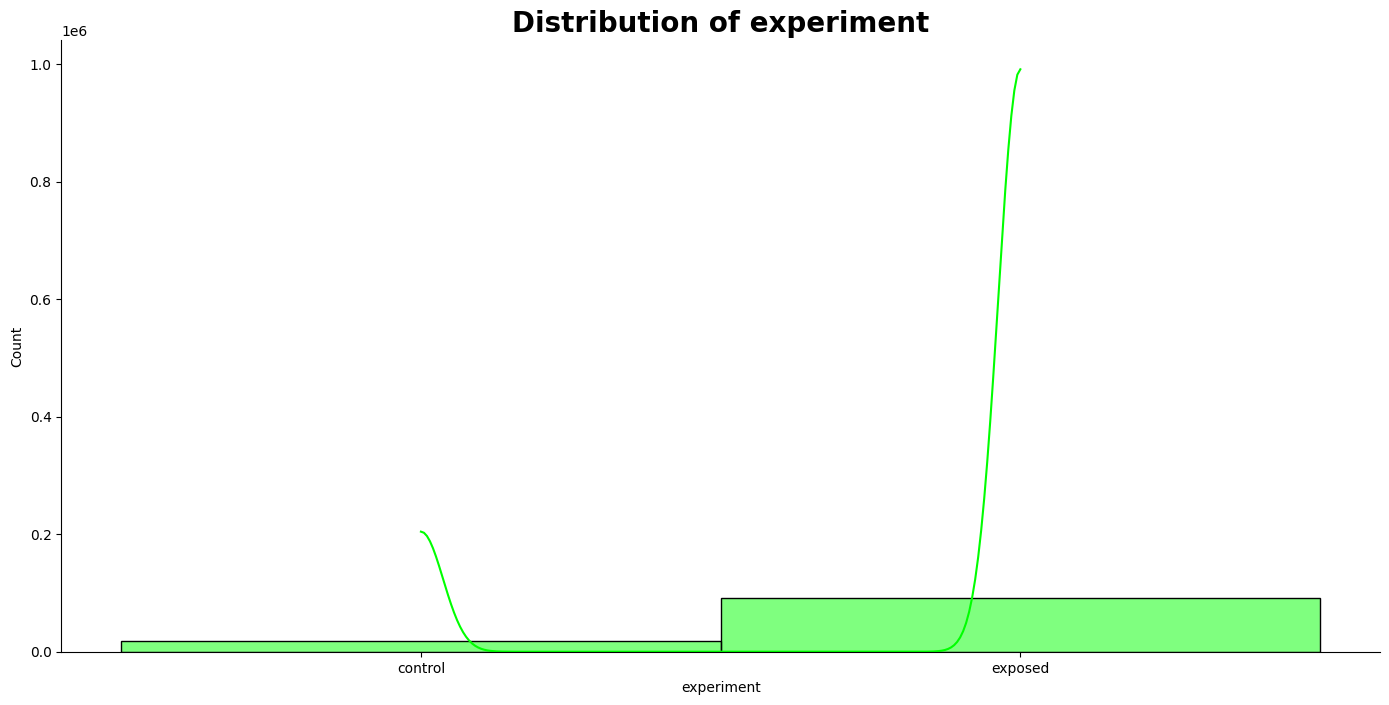

In [31]:
# histogram visual
fig = Plots.plot_hist(response,'experiment','lime')

In [32]:
# grouping by hour and its count
hour_data = response.groupby(['hour']).agg({'hour': ['count']})
hour_data.columns = ['count']
hour_data = hour_data.sort_values(by='count', ascending=False)
hour_data = hour_data.reset_index()
hour_data.head()

,hour,count
0,2,7840
1,3,7837
2,0,7746
3,1,7681
4,4,7591


<Figure size 900x700 with 0 Axes>

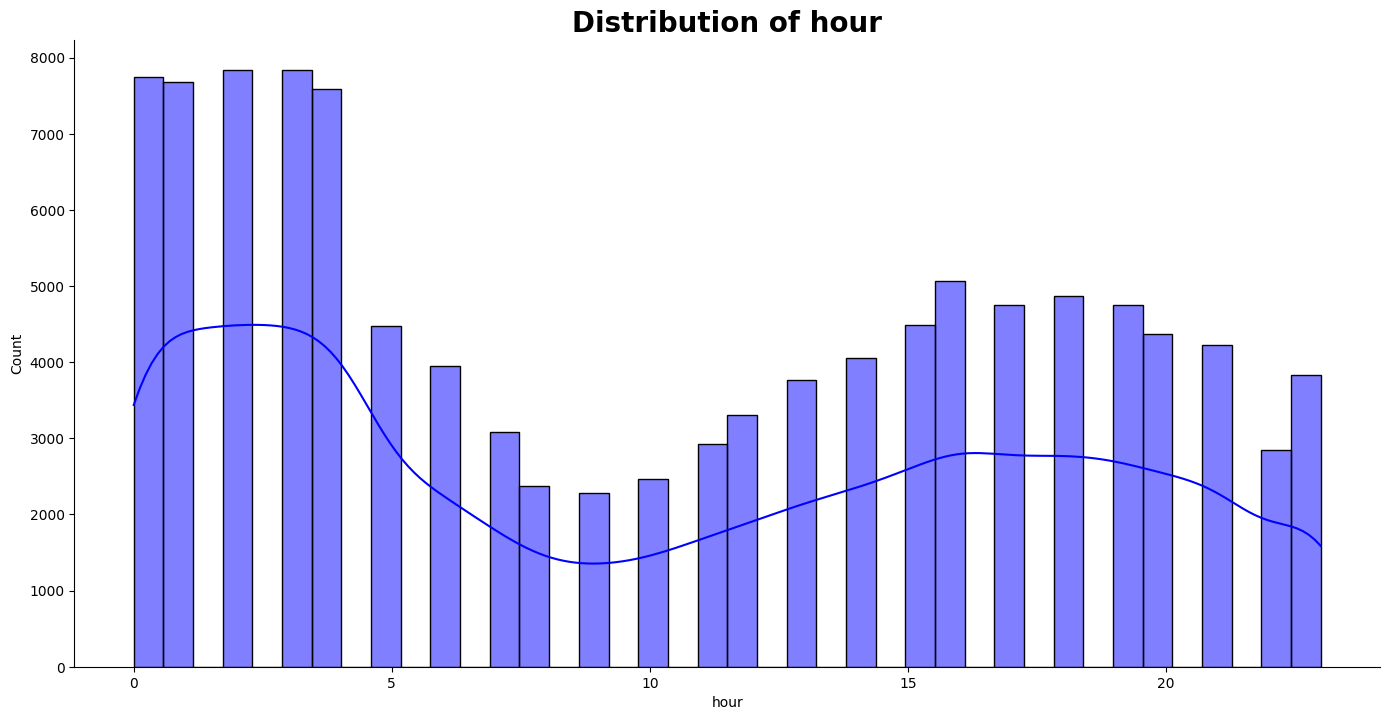

In [33]:
fig = Plots.plot_hist(response,'hour','blue')